# **MILESTONE 1:**

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather_filled.csv")

# **Inspection of data**

In [219]:
df_cpy = df.copy()
print("Shape of dataset: ",df_cpy.shape)
print("First 5 rows: ",df_cpy.head())

Shape of dataset:  (135023, 41)
First 5 rows:         country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693301400  2023-08-29 14:00                 28.8   
1          1693301400  2023-08-29 11:30                 27.0   
2          1693301400  2023-08-29 10:30                 28.0   
3          1693301400  2023-08-29 11:30                 10.2   
4          1693301400  2023-08-29 10:30                 25.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    83.8          Sunny  ...                

# INFORMATION

In [220]:
print(df_cpy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135023 entries, 0 to 135022
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       135023 non-null  object 
 1   location_name                 135023 non-null  object 
 2   latitude                      135023 non-null  float64
 3   longitude                     135023 non-null  float64
 4   timezone                      135023 non-null  object 
 5   last_updated_epoch            135023 non-null  int64  
 6   last_updated                  135023 non-null  object 
 7   temperature_celsius           135023 non-null  float64
 8   temperature_fahrenheit        135023 non-null  float64
 9   condition_text                135023 non-null  object 
 10  wind_mph                      135023 non-null  float64
 11  wind_kph                      135023 non-null  float64
 12  wind_degree                   135023 non-nul

## SUMMARY OF THE DATASET


In [221]:
print(df_cpy.describe())

            latitude      longitude  last_updated_epoch  temperature_celsius  \
count  135023.000000  135023.000000        1.350230e+05        135023.000000   
mean       19.185123      22.024850        1.725922e+09            21.692591   
std        24.482024      65.785243        1.868481e+07             9.679223   
min       -41.300000    -175.200000        1.693301e+09           -41.900000   
25%         3.750000      -6.836100        1.708708e+09            16.100000   
50%        17.250000      23.316700        1.727085e+09            24.200000   
75%        40.400000      50.580000        1.742032e+09            28.200000   
max        64.150000     179.220000        1.756973e+09            49.200000   

       temperature_fahrenheit       wind_mph       wind_kph    wind_degree  \
count           135023.000000  135023.000000  135023.000000  135023.000000   
mean                71.047825       8.048004      12.955092     168.484606   
std                 17.422647       7.252932 

# CHECKING NULL VALUES

In [222]:
print("Missing values per column:")
print(df_cpy.isnull().sum())
print("Data coverage (non-null counts):")
print(df_cpy.count())

Missing values per column:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone    

# CHECKING MISSING %AGE IN EACH COLUMN

In [223]:
missing_prcntge = (df_cpy.isnull().sum() / len(df) * 100)
print("Missing percentage per column:")
print(missing_prcntge)

Missing percentage per column:
country                         0.0
location_name                   0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0

# **AGGREGATE THE DATE COLUMN **

In [224]:
if 'last_updated' in df_cpy.columns:
    df_cpy['last_updated'] = pd.to_datetime(df_cpy['last_updated'])
    df_cpy.set_index('last_updated', inplace=True)
    monthly_avg = df_cpy.resample('M').mean(numeric_only=True)
    print("Monthly averages:")
    print(monthly_avg.head())


Monthly averages:
               latitude  longitude  last_updated_epoch  temperature_celsius  \
last_updated                                                                  
2023-08-31    18.596171  15.934573        1.693380e+09            23.109177   
2023-09-30    19.297636  21.853897        1.694800e+09            22.363110   
2023-10-31    19.427586  21.975658        1.697408e+09            20.858300   
2023-11-30    19.299494  21.962720        1.700131e+09            18.471591   
2023-12-31    19.306044  21.968945        1.702812e+09            16.832138   

              temperature_fahrenheit  wind_mph   wind_kph  wind_degree  \
last_updated                                                             
2023-08-31                 73.596044  7.165348  11.533544   169.091772   
2023-09-30                 72.254285  6.561523  10.559491   160.819051   
2023-10-31                 69.544872  6.821592  10.981242   163.294028   
2023-11-30                 65.248341  7.302617  11.754447 

# **MONTHLY AVR. TEMP. TREND**

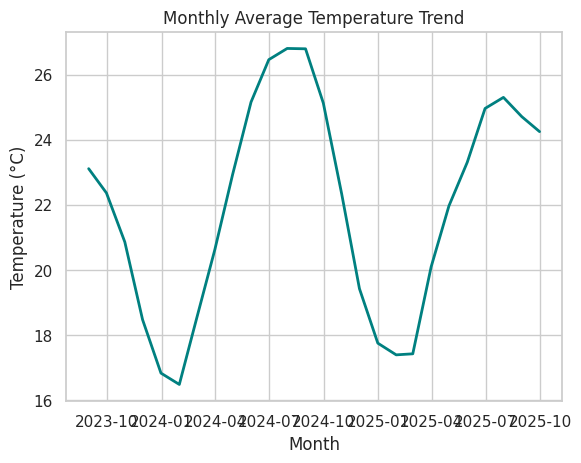

In [225]:
plt.plot(
    monthly_avg.index,
    monthly_avg['temperature_celsius'],
    color="teal",           # attractive red shade
    linewidth=2.0,             # thicker line
    )
plt.title("Monthly Average Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

## REMOVING DUPLICATE COLUMNS

In [226]:
df_cpy = df.copy()
df_cpy.drop(columns=[
    "temperature_fahrenheit","gust_mph","feels_like_fahrenheit",
    "wind_mph", "pressure_in", "precip_in",
    "visibility_miles"
], inplace=True)

df_cpy.set_index('last_updated', inplace=True)
print(df_cpy.head())

                      country     location_name  latitude  longitude  \
last_updated                                                           
2023-08-29 14:00  Afghanistan             Kabul     34.52      69.18   
2023-08-29 11:30      Albania            Tirana     41.33      19.82   
2023-08-29 10:30      Algeria           Algiers     36.76       3.05   
2023-08-29 11:30      Andorra  Andorra La Vella     42.50       1.52   
2023-08-29 10:30       Angola            Luanda     -8.84      13.23   

                        timezone  last_updated_epoch  temperature_celsius  \
last_updated                                                                
2023-08-29 14:00      Asia/Kabul          1693301400                 28.8   
2023-08-29 11:30   Europe/Tirane          1693301400                 27.0   
2023-08-29 10:30  Africa/Algiers          1693301400                 28.0   
2023-08-29 11:30  Europe/Andorra          1693301400                 10.2   
2023-08-29 10:30   Africa/Luanda 

In [227]:
print(df_cpy.shape)
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
            "AN": "Antarctica"
        }
        return continent_name[continent_code]
    except:
        return "Unknown"

df_cpy["region"] = df_cpy["country"].apply(country_to_continent)

print(df_cpy[["country", "region"]].head(20))

(135023, 33)
                              country         region
last_updated                                        
2023-08-29 14:00          Afghanistan           Asia
2023-08-29 11:30              Albania         Europe
2023-08-29 10:30              Algeria         Africa
2023-08-29 11:30              Andorra         Europe
2023-08-29 10:30               Angola         Africa
2023-08-29 05:30  Antigua and Barbuda  North America
2023-08-29 06:30            Argentina  South America
2023-08-29 13:30              Armenia           Asia
2023-08-29 19:30            Australia        Oceania
2023-08-29 11:30              Austria         Europe
2023-08-29 13:30           Azerbaijan           Asia
2023-08-29 05:30              Bahamas  North America
2023-08-29 12:30              Bahrain           Asia
2023-08-29 15:30           Bangladesh           Asia
2023-08-29 05:30             Barbados  North America
2023-08-29 12:30              Belarus         Europe
2023-08-29 11:30              Bel

In [228]:
print(df_cpy.head())

                      country     location_name  latitude  longitude  \
last_updated                                                           
2023-08-29 14:00  Afghanistan             Kabul     34.52      69.18   
2023-08-29 11:30      Albania            Tirana     41.33      19.82   
2023-08-29 10:30      Algeria           Algiers     36.76       3.05   
2023-08-29 11:30      Andorra  Andorra La Vella     42.50       1.52   
2023-08-29 10:30       Angola            Luanda     -8.84      13.23   

                        timezone  last_updated_epoch  temperature_celsius  \
last_updated                                                                
2023-08-29 14:00      Asia/Kabul          1693301400                 28.8   
2023-08-29 11:30   Europe/Tirane          1693301400                 27.0   
2023-08-29 10:30  Africa/Algiers          1693301400                 28.0   
2023-08-29 11:30  Europe/Andorra          1693301400                 10.2   
2023-08-29 10:30   Africa/Luanda 

In [229]:
df_cpy.to_csv("climate_with_regions.csv")


In [230]:
df_cpy = df_cpy[df_cpy['region'] != 'Unknown'].copy()
print(df_cpy['region'].value_counts())

region
Africa           33946
Asia             33554
Europe           30882
North America    15862
Oceania           8310
South America     8287
Name: count, dtype: int64


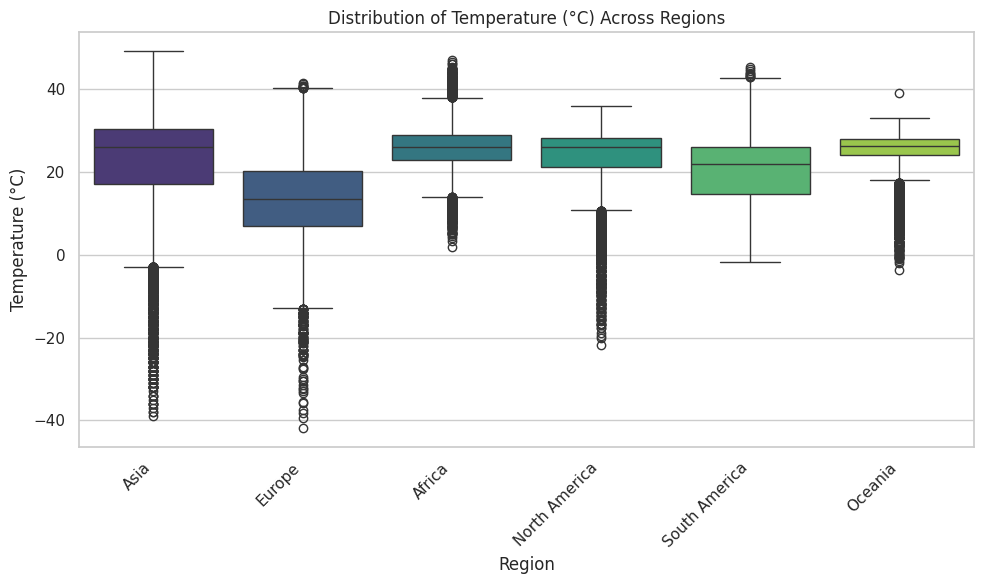

In [231]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='temperature_celsius', data=df_cpy, palette='viridis')
plt.title('Distribution of Temperature (°C) Across Regions')
plt.xlabel('Region')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Original 'temperature_celsius' statistics:
count    130841.000000
mean         21.637421
std           9.720687
min         -41.900000
25%          16.000000
50%          24.100000
75%          28.200000
max          49.200000
Name: temperature_celsius, dtype: float64

'temperature_celsius' statistics after handling outliers by region:
count    130841.000000
mean         22.187485
std           8.954564
min         -12.900000
25%          17.100000
50%          24.700000
75%          28.100000
max          49.200000
Name: temperature_celsius, dtype: float64


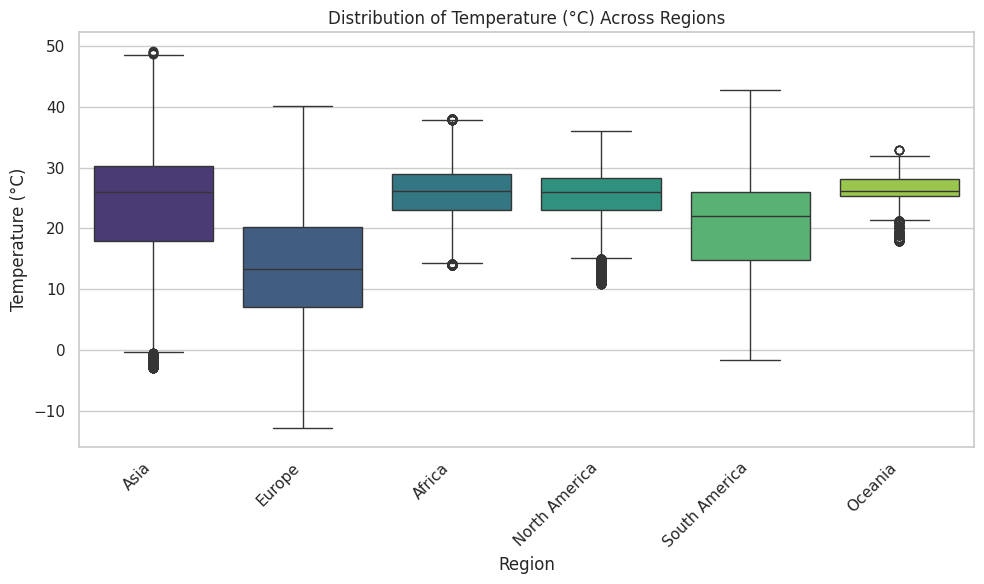

In [232]:
def replace_regional_outliers_with_median(df, column, group_col='region'):

    df_handled = df.copy()
    for region in df_handled[group_col].unique():
        region_df = df_handled[df_handled[group_col] == region]
        Q1 = region_df[column].quantile(0.25)
        Q3 = region_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_val = region_df[column].median()

        df_handled.loc[(df_handled[group_col] == region) &
                       ((df_handled[column] < lower_bound) | (df_handled[column] > upper_bound)), column] = median_val
    return df_handled
print("Original 'temperature_celsius' statistics:")
print(df_cpy['temperature_celsius'].describe())

df_cpy = replace_regional_outliers_with_median(df_cpy, 'temperature_celsius', 'region')

print("\n'temperature_celsius' statistics after handling outliers by region:")
print(df_cpy['temperature_celsius'].describe())
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='temperature_celsius', data=df_cpy, palette='viridis')
plt.title('Distribution of Temperature (°C) Across Regions')
plt.xlabel('Region')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# MILESTONE 2

Analyze weather data to understand distributions, correlations, seasonal patterns, and trends, identify extreme weather events, compare weather conditions across regions, and select suitable visualization types.

## Statistical analysis

### Subtask:
Calculate descriptive statistics for key weather variables to understand their distributions and central tendencies.


**Reasoning**:
Select the relevant numerical columns and calculate descriptive statistics.



In [233]:
# Select relevant numerical columns
numerical_cols = [
    'temperature_celsius', 'wind_kph', 'pressure_mb', 'humidity', 'cloud',
    'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'air_quality_gb-defra-index', 'moon_illumination'
]

# Check data types of selected columns
print("Data types of selected columns:")
print(df_cpy[numerical_cols].info())


Data types of selected columns:
<class 'pandas.core.frame.DataFrame'>
Index: 130841 entries, 2023-08-29 14:00 to 2025-09-04 10:00
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   temperature_celsius           130841 non-null  float64
 1   wind_kph                      130841 non-null  float64
 2   pressure_mb                   130841 non-null  float64
 3   humidity                      130841 non-null  int64  
 4   cloud                         130841 non-null  int64  
 5   feels_like_celsius            130841 non-null  float64
 6   visibility_km                 130841 non-null  float64
 7   uv_index                      130841 non-null  float64
 8   gust_kph                      130841 non-null  float64
 9   air_quality_Carbon_Monoxide   130841 non-null  float64
 10  air_quality_Ozone             130841 non-null  float64
 11  air_quality_Nitrogen_dioxide  130841 non-null  float

## Correlation analysis

### Subtask:
Analyze correlations between different weather variables to identify relationships.


**Reasoning**:
Calculate the pairwise correlation of the numerical columns in the `df_cpy` DataFrame and store it in `correlation_matrix`.



In [234]:
correlation_matrix = df_cpy.corr(numeric_only=True)
print(correlation_matrix)

                              latitude  longitude  last_updated_epoch  \
latitude                      1.000000   0.008156           -0.002449   
longitude                     0.008156   1.000000            0.002058   
last_updated_epoch           -0.002449   0.002058            1.000000   
temperature_celsius          -0.402223   0.062874            0.091253   
wind_kph                      0.019234  -0.007677            0.037228   
wind_degree                   0.152544   0.050634            0.030639   
pressure_mb                   0.011507  -0.078508            0.022686   
precip_mm                    -0.051936   0.033883           -0.003208   
humidity                     -0.055662  -0.115131           -0.082036   
cloud                        -0.056646   0.016544            0.017549   
feels_like_celsius           -0.403587   0.025137            0.081462   
visibility_km                -0.023727   0.097929            0.004539   
uv_index                     -0.135964  -0.038922  

## Identify extreme weather events

### Subtask:
Define criteria for extreme weather events and identify them in the dataset.


**Reasoning**:
Define the thresholds for extreme temperature and precipitation and create new columns to flag extreme events in the dataframe.



In [235]:
extreme_temp_threshold = df_cpy['temperature_celsius'].quantile(0.95)

# Define thresholds (prep. above the 95th percentile)
extreme_precip_threshold = df_cpy['precip_mm'].quantile(0.95)
df_cpy['is_extreme_temperature'] = df_cpy['temperature_celsius'] > extreme_temp_threshold
df_cpy['is_extreme_precipitation'] = df_cpy['precip_mm'] > extreme_precip_threshold
df_cpy['is_extreme_weather'] = df_cpy['is_extreme_temperature'] | df_cpy['is_extreme_precipitation']
print("Extreme temperature threshold:", extreme_temp_threshold)
print("Extreme precipitation threshold:", extreme_precip_threshold)
print("\nDataFrame with extreme weather flags:")
print(df_cpy[['temperature_celsius', 'precip_mm', 'is_extreme_temperature', 'is_extreme_precipitation', 'is_extreme_weather']].head())

Extreme temperature threshold: 34.0
Extreme precipitation threshold: 0.8

DataFrame with extreme weather flags:
                  temperature_celsius  precip_mm  is_extreme_temperature  \
last_updated                                                               
2023-08-29 14:00                 28.8        0.0                   False   
2023-08-29 11:30                 27.0        0.0                   False   
2023-08-29 10:30                 28.0        0.0                   False   
2023-08-29 11:30                 10.2        0.0                   False   
2023-08-29 10:30                 25.0        0.0                   False   

                  is_extreme_precipitation  is_extreme_weather  
last_updated                                                    
2023-08-29 14:00                     False               False  
2023-08-29 11:30                     False               False  
2023-08-29 10:30                     False               False  
2023-08-29 11:30              

## Compare weather conditions across regions

### Subtask:
Group the data by region and compare key weather metrics.


**Reasoning**:
Group the data by region and calculate the mean of relevant weather metrics.



In [236]:
regional_weather = df_cpy.groupby('region')[['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']].mean()
print("Regional Average Weather Metrics:")
print(regional_weather)

Regional Average Weather Metrics:
               temperature_celsius   humidity   wind_kph  precip_mm
region                                                             
Africa                   25.885539  59.228422  13.245248   0.126046
Asia                     23.901782  56.768433  12.056756   0.140262
Europe                   13.922411  68.456998  13.257402   0.102919
North America            25.205296  78.737738  14.224801   0.145539
Oceania                  26.468412  83.689290  16.460806   0.271884
South America            20.829130  73.221069   9.468336   0.143668


## Generate visualizations

### Subtask:
Create visualizations to illustrate the findings from the analysis.


**Reasoning**:
Create the requested visualizations to illustrate the findings from the analysis.



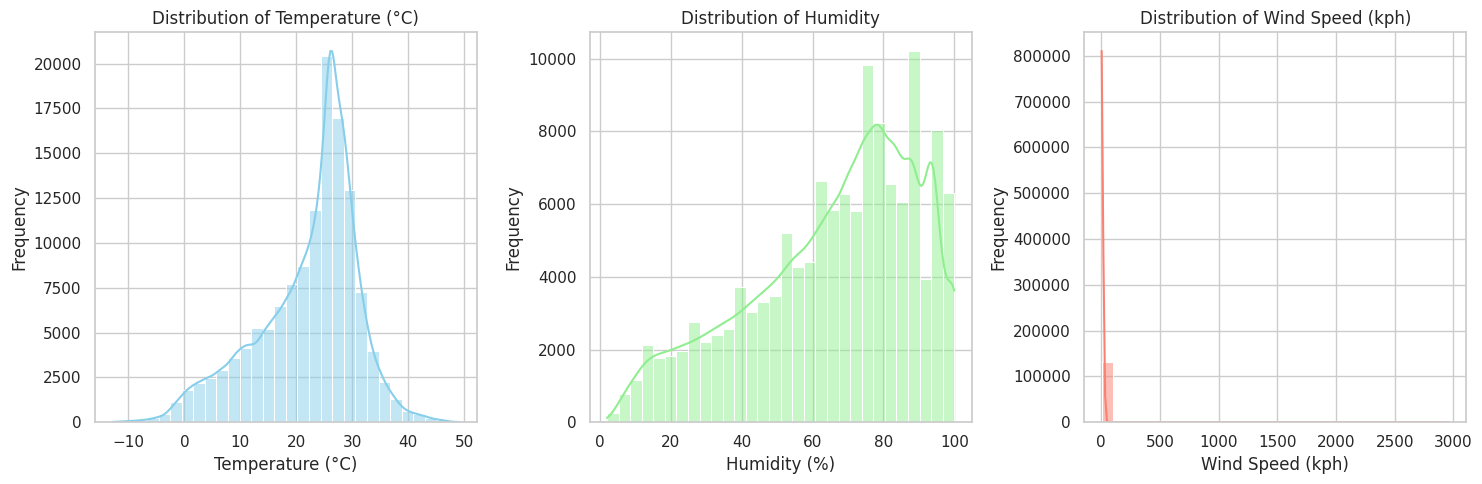

In [237]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature distribution
sns.histplot(df_cpy['temperature_celsius'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Temperature (°C)")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Frequency")

# Humidity distribution
sns.histplot(df_cpy['humidity'], bins=30, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Distribution of Humidity")
axes[1].set_xlabel("Humidity (%)")
axes[1].set_ylabel("Frequency")

# Wind speed distribution
sns.histplot(df_cpy['wind_kph'], bins=30, kde=True, ax=axes[2], color="salmon")
axes[2].set_title("Distribution of Wind Speed (kph)")
axes[2].set_xlabel("Wind Speed (kph)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


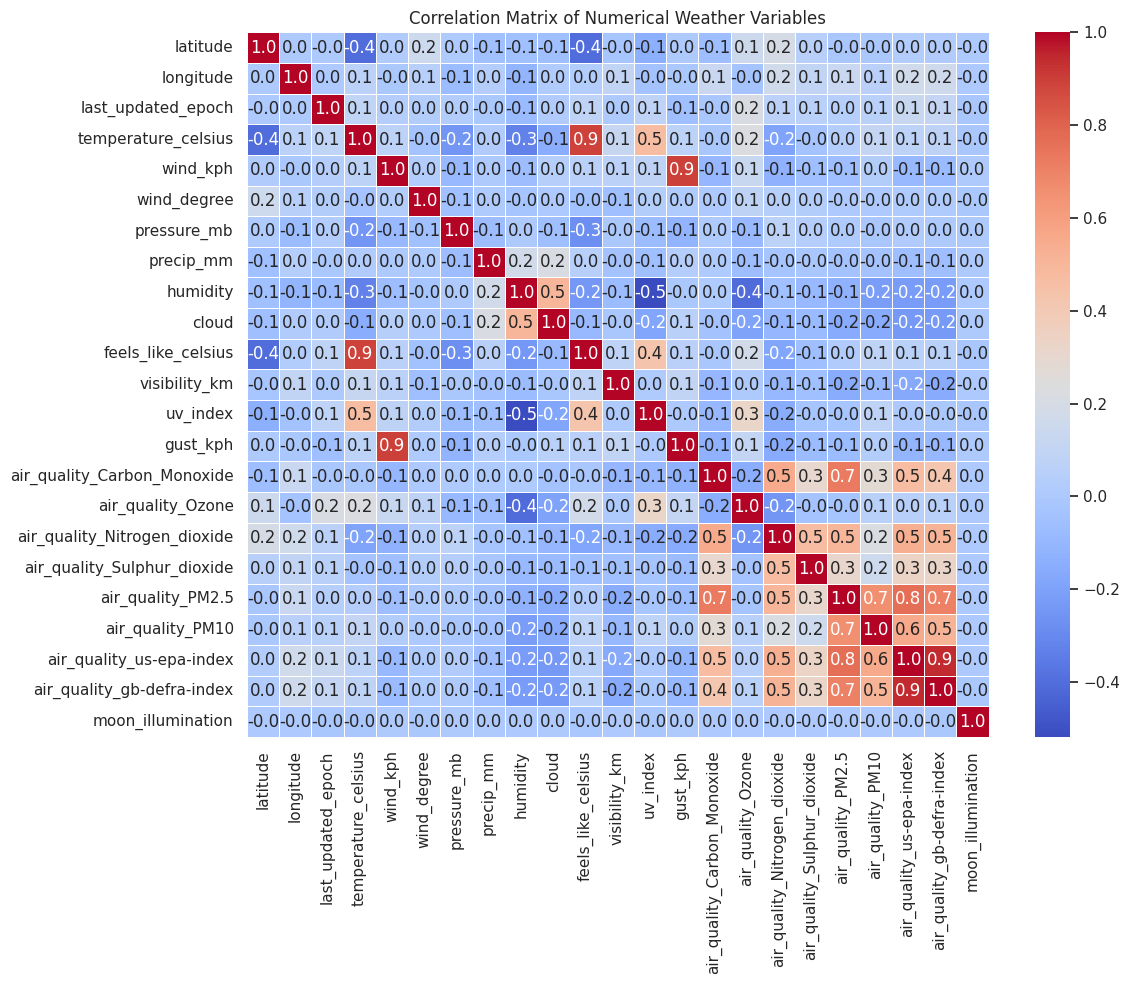

In [238]:
# 2. Heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Weather Variables')
plt.tight_layout()
plt.show()

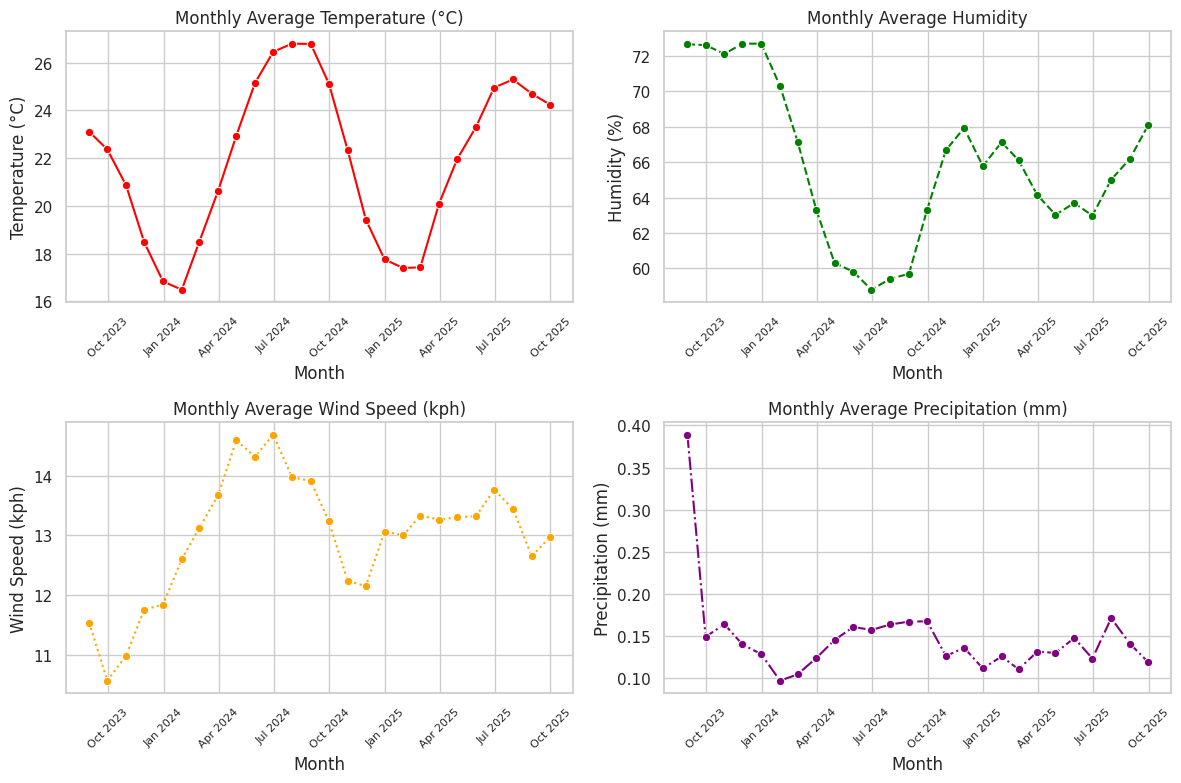

In [239]:
# 3. Line graphs for monthly averages (seasonal patterns)
seasonal_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']
monthly_seasonal = monthly_avg[seasonal_cols]
plt.figure(figsize=(12, 8))
# 1. Temperature
ax1 = plt.subplot(2, 2, 1)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['temperature_celsius'], marker="o", color="red", ax=ax1,)
ax1.set_title("Monthly Average Temperature (°C)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature (°C)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.tick_params(axis='x', rotation=45, labelsize=8)
# 2. Humidity
ax2 = plt.subplot(2, 2, 2)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['humidity'], marker="o", color="green",linestyle='--' , ax=ax2)
ax2.set_title("Monthly Average Humidity")
ax2.set_xlabel("Month")
ax2.set_ylabel("Humidity (%)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# 3. Wind Speed
ax3 = plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['wind_kph'], marker="o", color="orange", linestyle='dotted' ,ax=ax3)
ax3.set_title("Monthly Average Wind Speed (kph)")
ax3.set_xlabel("Month")
ax3.set_ylabel("Wind Speed (kph)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax3.tick_params(axis='x', rotation=45, labelsize=8)

# 4. Precipitation
ax4 = plt.subplot(2, 2, 4)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['precip_mm'], marker="o", color="purple",linestyle='-.' , ax=ax4)
ax4.set_title("Monthly Average Precipitation (mm)")
ax4.set_xlabel("Month")
ax4.set_ylabel("Precipitation (mm)")
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax4.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

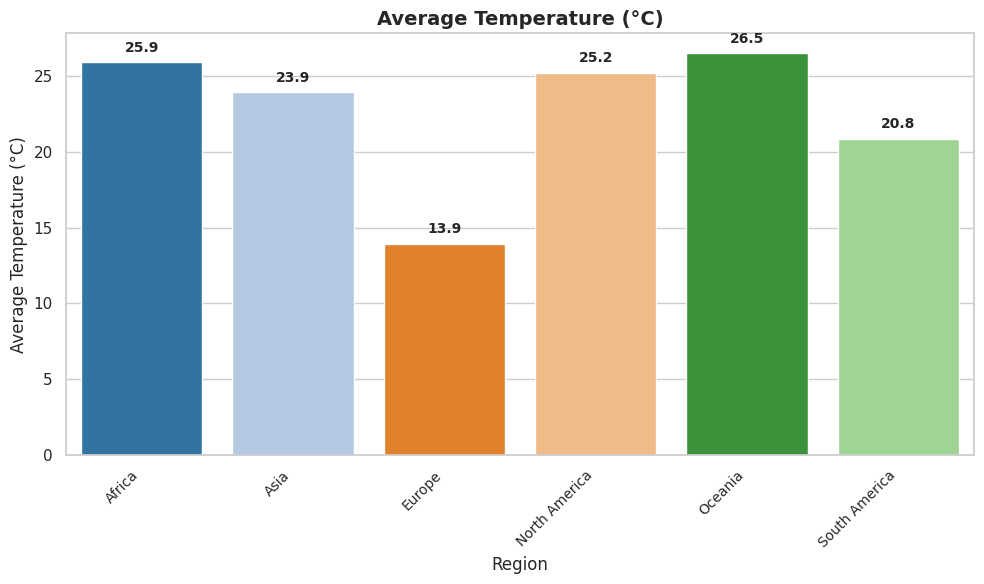

In [240]:
# 5. Bar plot comparing average temperature across regions
plt.figure(figsize=(10, 6))
sns.barplot(
    x=regional_weather.index,
    y=regional_weather['temperature_celsius'],
    palette="tab20"
)

for i, val in enumerate(regional_weather['temperature_celsius']):
    plt.text(i, val + 0.5, f"{val:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Average Temperature (°C)", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

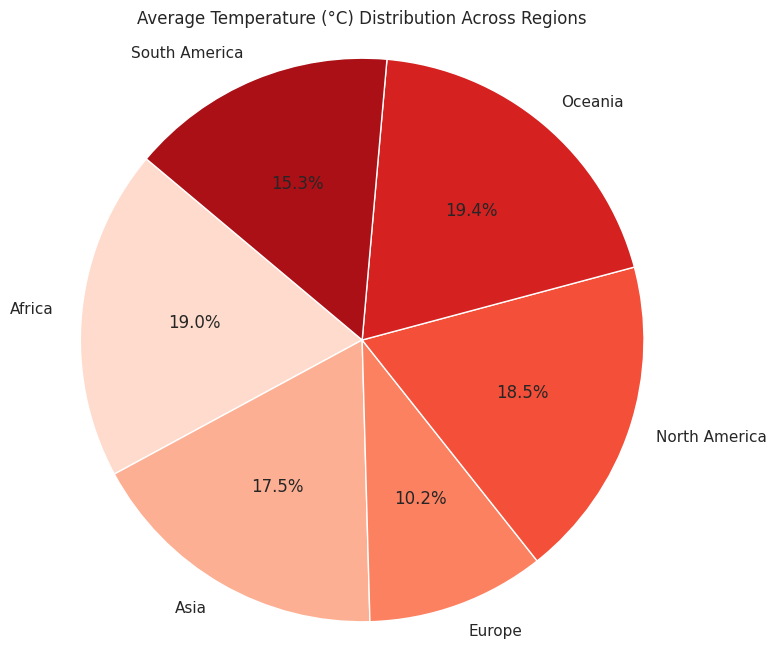

In [241]:
# Group by region and calculate the mean for the requested metrics
regional_metrics = df_cpy.groupby('region')[['temperature_celsius', 'humidity', 'wind_kph']].mean()

# Create a pie chart for average temperature across regions
plt.figure(figsize=(8, 8))
plt.pie(regional_metrics['temperature_celsius'], labels=regional_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds', len(regional_metrics)))
plt.title('Average Temperature (°C) Distribution Across Regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

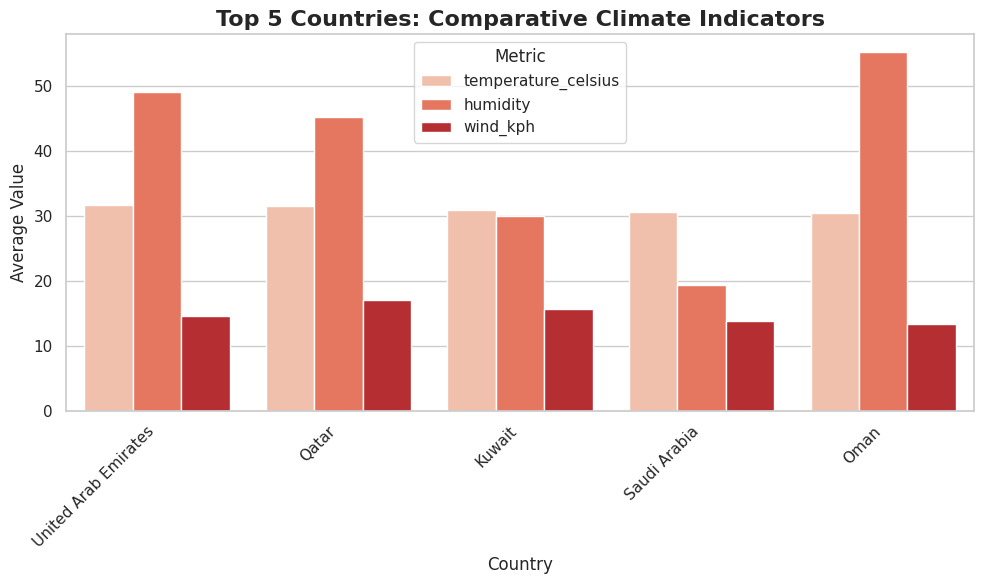

In [242]:
country_avg = df_cpy.groupby("country")[["temperature_celsius", "humidity", "wind_kph"]].mean().reset_index()
top5_countries = country_avg.nlargest(5, "temperature_celsius")
metrics_melted = top5_countries.melt(
    id_vars="country",
    value_vars=["temperature_celsius", "humidity", "wind_kph"],
    var_name="Metric",
    value_name="Value"
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="country", y="Value", hue="Metric",
    data=metrics_melted, palette="Reds"
)
plt.title("Top 5 Countries: Comparative Climate Indicators", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [243]:

country_avg = df_cpy.groupby("country")[["temperature_celsius", "humidity", "wind_kph"]].mean().reset_index()
fig = px.choropleth(
    country_avg,
    locations="country",
    locationmode="country names",
    color="temperature_celsius",
    hover_name="country",
    hover_data={"humidity": True, "wind_kph": True},
    color_continuous_scale="RdYlBu_r",
    title="Average Temperature (°C) Across Countries"
)
fig.show()


# **Humidity Of Top 5 Countries**

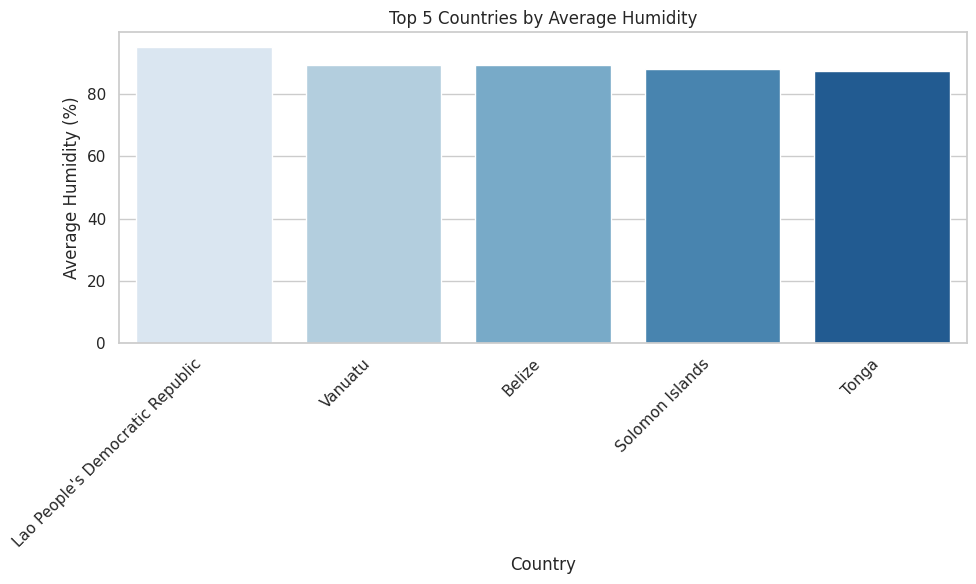

In [244]:
top5_humidity_countries = country_avg.nlargest(5, 'humidity')
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='humidity', data=top5_humidity_countries, palette='Blues')
plt.title('Top 5 Countries by Average Humidity')
plt.xlabel('Country')
plt.ylabel('Average Humidity (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

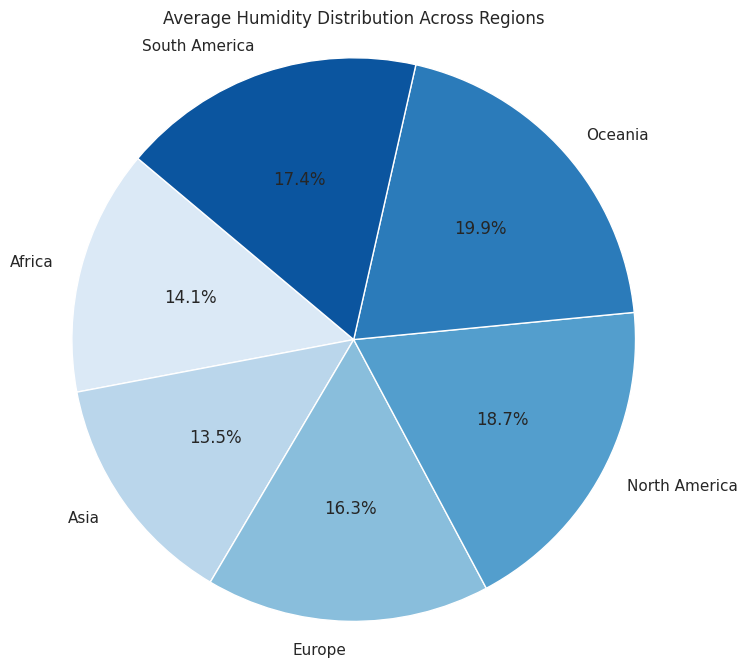

In [245]:
# Create a pie chart for average humidity across regions
plt.figure(figsize=(8, 8))
plt.pie(regional_metrics['humidity'], labels=regional_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(regional_metrics)))
plt.title('Average Humidity Distribution Across Regions')
plt.axis('equal')
plt.show()

In [246]:
fig = px.choropleth(
    country_avg,
    locations="country",
    locationmode="country names",
    color="humidity",
    hover_name="country",
    hover_data={"temperature_celsius": True, "wind_kph": True},
    color_continuous_scale="Blues",
    title="Average Humidity Across Countries"
)
fig.show()

# **Wind Speed Of Top 5 Countries**

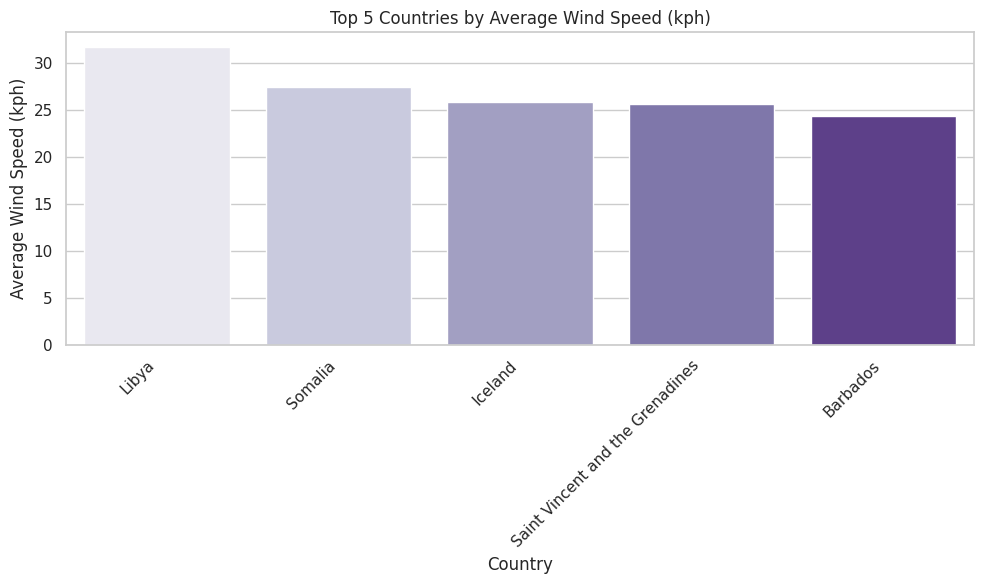

In [247]:
top5_wind_countries = country_avg.nlargest(5, 'wind_kph')
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='wind_kph', data=top5_wind_countries, palette='Purples')
plt.title('Top 5 Countries by Average Wind Speed (kph)')
plt.xlabel('Country')
plt.ylabel('Average Wind Speed (kph)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

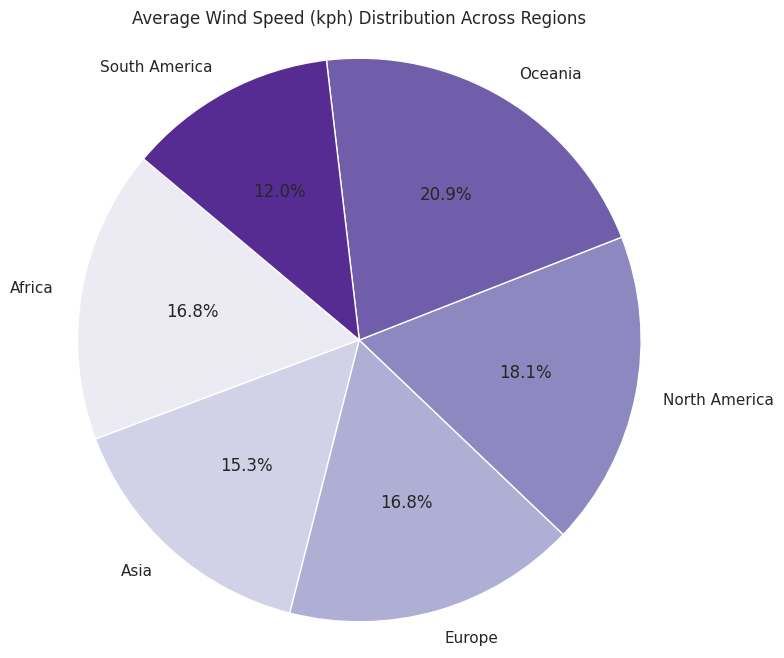

In [248]:
# Create a pie chart for average wind speed across regions
plt.figure(figsize=(8, 8))
plt.pie(regional_metrics['wind_kph'], labels=regional_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Purples', len(regional_metrics)))
plt.title('Average Wind Speed (kph) Distribution Across Regions')
plt.axis('equal')
plt.show()

In [249]:
fig = px.choropleth(
    country_avg,
    locations="country",
    locationmode="country names",
    color="wind_kph",
    hover_name="country",
    hover_data={"temperature_celsius": True, "humidity": True},
    color_continuous_scale="Plasma",
    title="Average Wind Speed (kph) Across Countries"
)
fig.show()

In [250]:
country_avg_air_quality = df_cpy.groupby('country')['air_quality_us-epa-index'].mean().reset_index()

# Top 5 countries with best air quality (lowest index)
top5_good_air_quality = country_avg_air_quality.nsmallest(5, 'air_quality_us-epa-index')
print("Top 5 countries with the best air quality (US EPA Index):")
print(top5_good_air_quality)

# Top 5 countries with bad air quality (highest index)
top5_bad_air_quality = country_avg_air_quality.nlargest(5, 'air_quality_us-epa-index')
print("\nTop 5 countries with the worst air quality (US EPA Index):")
print(top5_bad_air_quality)

Top 5 countries with the best air quality (US EPA Index):
             country  air_quality_us-epa-index
36          Colombia                  1.000000
163             Togo                  1.000000
71           Iceland                  1.002882
148  Solomon Islands                  1.004323
116      New Zealand                  1.023088

Top 5 countries with the worst air quality (US EPA Index):
          country  air_quality_us-epa-index
35          China                  4.215007
72          India                  4.151734
98       Malaysia                  3.587896
141  Saudi Arabia                  3.495665
34          Chile                  3.445731


# Top 5 Countries Having Good Air Quality

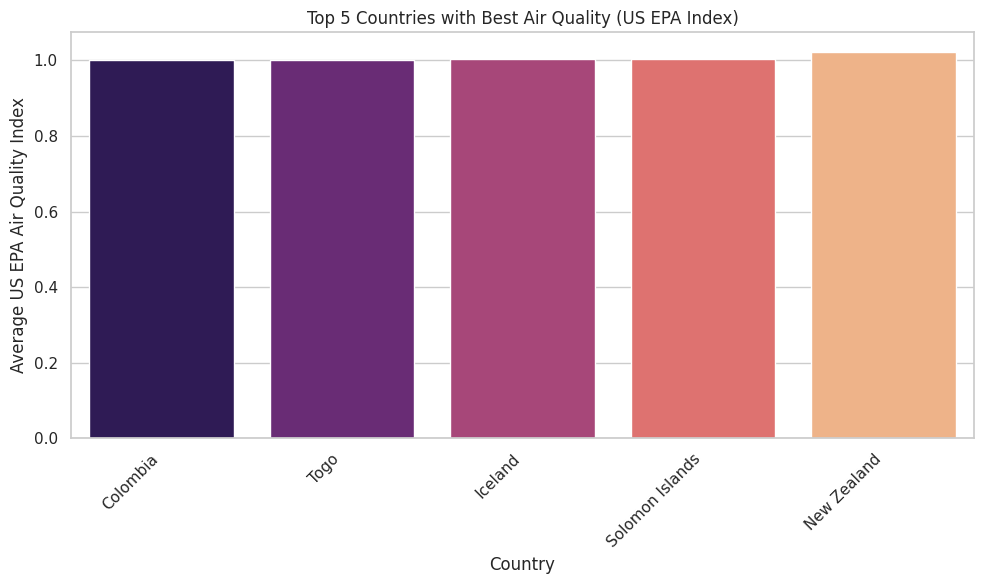

In [251]:
country_avg_air_quality = df_cpy.groupby('country')['air_quality_us-epa-index'].mean().reset_index()
top5_good_air_quality = country_avg_air_quality.nsmallest(5, 'air_quality_us-epa-index')


plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='air_quality_us-epa-index', data=top5_good_air_quality, palette='magma')
plt.title('Top 5 Countries with Best Air Quality (US EPA Index)')
plt.xlabel('Country')
plt.ylabel('Average US EPA Air Quality Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Top 5 Countries Having Bad Air Quality

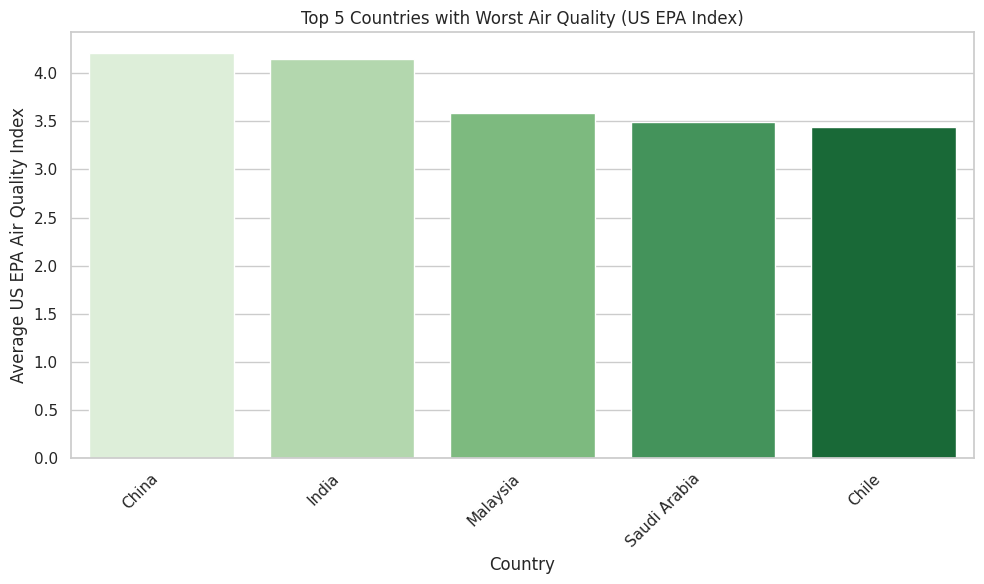

In [252]:
top5_bad_air_quality = country_avg_air_quality.nlargest(5, 'air_quality_us-epa-index')
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='air_quality_us-epa-index', data=top5_bad_air_quality, palette='Greens')
plt.title('Top 5 Countries with Worst Air Quality (US EPA Index)')
plt.xlabel('Country')
plt.ylabel('Average US EPA Air Quality Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [253]:
fig = px.choropleth(
    country_avg_air_quality,
    locations="country",
    locationmode="country names",
    color="air_quality_us-epa-index",
    hover_name="country",
    color_continuous_scale="Viridis_r",
    title="Average US EPA Air Quality Index Across Countries"
)
fig.show()